# Módulo 5. Entregable

In [845]:
# Importar las librerias necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from symbulate import *
import sklearn
import statsmodels.api as sm
import seaborn as sns

In [846]:
# Importar los archivos
df_1 = pd.read_csv("us2022q2a.csv")
df_1

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.761670,104.0000,452000.000,NaN,2000,1
1,A,2000q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,2679000.000,512000.000,0.000,4642000.000,45.215607,73.7500,452271.967,6.0,2000,2
2,A,2000q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,2925000.000,528000.000,0.000,4902000.000,30.003238,48.9375,453014.579,9.0,2000,3
3,A,2000q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,3160000.000,830000.000,0.000,5265000.000,33.566841,54.7500,456366.381,12.0,2000,4
4,A,2001q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,3667000.000,556000.000,0.000,5541000.000,18.840347,30.7300,456769.737,3.0,2001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324441,ZYNE,2021q2,0.0,0.0,9.838494e+03,0.0,-117.528220,-5.943,0.0,98195.904,10496.647,206.211,468.385,87699.257,5.290000,5.2900,41251.537,6.0,2021,2
324442,ZYNE,2021q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,11309.171,207.635,411.237,78686.999,4.240000,4.2400,41251.537,9.0,2021,3
324443,ZYNE,2021q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,10258.173,209.068,353.694,70913.334,2.880000,2.8800,41217.537,12.0,2021,4
324444,ZYNE,2022q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,9214.059,210.512,295.754,65166.970,2.050000,2.0500,42447.037,3.0,2022,1


In [847]:
df_2 = pd.read_csv("usfirms2022.csv", usecols=['Ticker', 'Name', 'Sector NAICS\nlevel 1'])
df_2

,Ticker,Name,Sector NAICS\nlevel 1
0,FLWS,1 800 Flowers Com Inc,Retail Trade
1,TXG,"10x Genomics, Inc",Manufacturing
2,GOED,1847 Goedeker Inc,Retail Trade
3,ONEM,"1life Healthcare, Inc",Health Care and Social Assistance
4,SRCE,1st Source Corp,Finance and Insurance
...,...,...,...
3603,ZUO,"Zuora, Inc",Information
3604,ZWS,Zurn Elkay Water Solutions Corp,Manufacturing
3605,ZY,Zymergen Inc,"Professional, Scientific, and Technical Services"
3606,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing


In [848]:
# Merge con otra tabla
df = pd.merge(df_1, df_2, left_on='firm', right_on='Ticker')
df

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Ticker,Name,Sector NAICS\nlevel 1
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,63.761670,104.0000,452000.000,NaN,2000,1,A,"Agilent Technologies, Inc",Manufacturing
1,A,2000q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,...,4642000.000,45.215607,73.7500,452271.967,6.0,2000,2,A,"Agilent Technologies, Inc",Manufacturing
2,A,2000q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,...,4902000.000,30.003238,48.9375,453014.579,9.0,2000,3,A,"Agilent Technologies, Inc",Manufacturing
3,A,2000q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,...,5265000.000,33.566841,54.7500,456366.381,12.0,2000,4,A,"Agilent Technologies, Inc",Manufacturing
4,A,2001q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,...,5541000.000,18.840347,30.7300,456769.737,3.0,2001,1,A,"Agilent Technologies, Inc",Manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9.838494e+03,0.0,-117.528220,-5.943,0.0,98195.904,...,87699.257,5.290000,5.2900,41251.537,6.0,2021,2,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing
323812,ZYNE,2021q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,...,78686.999,4.240000,4.2400,41251.537,9.0,2021,3,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing
323813,ZYNE,2021q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,...,70913.334,2.880000,2.8800,41217.537,12.0,2021,4,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing
323814,ZYNE,2022q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,...,65166.970,2.050000,2.0500,42447.037,3.0,2022,1,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing


In [849]:
# Dividirlo por periodo
df['q'] = pd.PeriodIndex(df['q'], freq="Q")

In [850]:
# Seleccionar la industria de manufactura
df_last = df.loc[(df['Sector NAICS\nlevel 1'] == 'Manufacturing')]
df_last

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Ticker,Name,Sector NAICS\nlevel 1
0,A,2000Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,63.761670,104.0000,452000.000,NaN,2000,1,A,"Agilent Technologies, Inc",Manufacturing
1,A,2000Q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,...,4642000.000,45.215607,73.7500,452271.967,6.0,2000,2,A,"Agilent Technologies, Inc",Manufacturing
2,A,2000Q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,...,4902000.000,30.003238,48.9375,453014.579,9.0,2000,3,A,"Agilent Technologies, Inc",Manufacturing
3,A,2000Q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,...,5265000.000,33.566841,54.7500,456366.381,12.0,2000,4,A,"Agilent Technologies, Inc",Manufacturing
4,A,2001Q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,...,5541000.000,18.840347,30.7300,456769.737,3.0,2001,1,A,"Agilent Technologies, Inc",Manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021Q2,0.0,0.0,9.838494e+03,0.0,-117.528220,-5.943,0.0,98195.904,...,87699.257,5.290000,5.2900,41251.537,6.0,2021,2,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing
323812,ZYNE,2021Q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,...,78686.999,4.240000,4.2400,41251.537,9.0,2021,3,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing
323813,ZYNE,2021Q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,...,70913.334,2.880000,2.8800,41217.537,12.0,2021,4,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing
323814,ZYNE,2022Q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,...,65166.970,2.050000,2.0500,42447.037,3.0,2022,1,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing


In [851]:
# Establecer firm como index
df_last['qdate'] = df_last['q']
df_last.set_index(['firm','qdate'], inplace=True)
df_last

C:\Users\Keyuan\AppData\Local\Temp\ipykernel_19808\1430772088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last['qdate'] = df_last['q']


q    revenue       cogs          sgae  otheropexp  \
firm qdate                                                            
A    2000Q1  2000Q1        NaN        NaN           NaN         NaN   
     2000Q2  2000Q2  2485000.0  1261000.0  1.010000e+06         0.0   
     2000Q3  2000Q3  2670000.0  1369000.0  1.091000e+06         0.0   
     2000Q4  2000Q4  3372000.0  1732000.0  1.182000e+06         0.0   
     2001Q1  2001Q1  2841000.0  1449000.0  1.113000e+06         0.0   
...             ...        ...        ...           ...         ...   
ZYNE 2021Q2  2021Q2        0.0        0.0  9.838494e+03         0.0   
     2021Q3  2021Q3        0.0        0.0  1.021065e+04         0.0   
     2021Q4  2021Q4        0.0        0.0  8.836436e+03         0.0   
     2022Q1  2022Q1        0.0        0.0  8.903915e+03         0.0   
     2022Q2  2022Q2        0.0        0.0  9.168770e+03         0.0   

              extraincome  finexp  incometax  totalassets  totalliabilities  \
firm qdate                                                                    
A    2000Q1           NaN     NaN        NaN          NaN               NaN   
     2000Q2  42000.000000   0.000    90000.0  7321000.000       2679000.000   
     2000Q3  28000.000000   0.000    83000.0  7827000.000       2925000.000   
     2000Q4  10000.000000   0.000   163000.0  8425000.000       3160000.000   
     2001Q1  -6000.000000   0.000   119000.0  9208000.000       3667000.000   
...                   ...     ...        ...          ...               ...   
ZYNE 2021Q2   -117.528220  -5.943        0.0    98195.904         10496.647   
     2021Q3   -376.636750  -5.038        0.0    89996.170         11309.171   
     2021Q4     16.937906  -4.433        0.0    81171.507         10258.173   
     2022Q1    317.252110 -96.044        0.0    74381.029          9214.059   
     2022Q2   -775.927860 -91.691        0.0    67006.959          9765.086   

             ...  stockholderequity   adjprice  originalprice  \
firm qdate   ...                                                
A    2000Q1  ...                NaN  63.761670       104.0000   
     2000Q2  ...        4642000.000  45.215607        73.7500   
     2000Q3  ...        4902000.000  30.003238        48.9375   
     2000Q4  ...        5265000.000  33.566841        54.7500   
     2001Q1  ...        5541000.000  18.840347        30.7300   
...          ...                ...        ...            ...   
ZYNE 2021Q2  ...          87699.257   5.290000         5.2900   
     2021Q3  ...          78686.999   4.240000         4.2400   
     2021Q4  ...          70913.334   2.880000         2.8800   
     2022Q1  ...          65166.970   2.050000         2.0500   
     2022Q2  ...          57241.873   1.140000         1.1400   

             sharesoutstanding  fiscalmonth  year  cto  Ticker  \
firm qdate                                                       
A    2000Q1         452000.000          NaN  2000    1       A   
     2000Q2         452271.967          6.0  2000    2       A   
     2000Q3         453014.579          9.0  2000    3       A   
     2000Q4         456366.381         12.0  2000    4       A   
     2001Q1         456769.737          3.0  2001    1       A   
...                        ...          ...   ...  ...     ...   
ZYNE 2021Q2          41251.537          6.0  2021    2    ZYNE   
     2021Q3          41251.537          9.0  2021    3    ZYNE   
     2021Q4          41217.537         12.0  2021    4    ZYNE   
     2022Q1          42447.037          3.0  2022    1    ZYNE   
     2022Q2          43595.959          6.0  2022    2    ZYNE   

                                     Name Sector NAICS\nlevel 1  
firm qdate                                                       
A    2000Q1     Agilent Technologies, Inc         Manufacturing  
     2000Q2     Agilent Technologies, Inc         Manufacturing  
     2000Q3     Agilent Technologies, Inc         Manufacturing  
     2000Q4     Agilent Technol

In [852]:
# Eliminar las columnas innecesarias
df_manu = df_last.drop(['Ticker', 'year', 'Sector NAICS\nlevel 1', 'cto'], axis=1)
df_manu

q    revenue       cogs          sgae  otheropexp  \
firm qdate                                                            
A    2000Q1  2000Q1        NaN        NaN           NaN         NaN   
     2000Q2  2000Q2  2485000.0  1261000.0  1.010000e+06         0.0   
     2000Q3  2000Q3  2670000.0  1369000.0  1.091000e+06         0.0   
     2000Q4  2000Q4  3372000.0  1732000.0  1.182000e+06         0.0   
     2001Q1  2001Q1  2841000.0  1449000.0  1.113000e+06         0.0   
...             ...        ...        ...           ...         ...   
ZYNE 2021Q2  2021Q2        0.0        0.0  9.838494e+03         0.0   
     2021Q3  2021Q3        0.0        0.0  1.021065e+04         0.0   
     2021Q4  2021Q4        0.0        0.0  8.836436e+03         0.0   
     2022Q1  2022Q1        0.0        0.0  8.903915e+03         0.0   
     2022Q2  2022Q2        0.0        0.0  9.168770e+03         0.0   

              extraincome  finexp  incometax  totalassets  totalliabilities  \
firm qdate                                                                    
A    2000Q1           NaN     NaN        NaN          NaN               NaN   
     2000Q2  42000.000000   0.000    90000.0  7321000.000       2679000.000   
     2000Q3  28000.000000   0.000    83000.0  7827000.000       2925000.000   
     2000Q4  10000.000000   0.000   163000.0  8425000.000       3160000.000   
     2001Q1  -6000.000000   0.000   119000.0  9208000.000       3667000.000   
...                   ...     ...        ...          ...               ...   
ZYNE 2021Q2   -117.528220  -5.943        0.0    98195.904         10496.647   
     2021Q3   -376.636750  -5.038        0.0    89996.170         11309.171   
     2021Q4     16.937906  -4.433        0.0    81171.507         10258.173   
     2022Q1    317.252110 -96.044        0.0    74381.029          9214.059   
     2022Q2   -775.927860 -91.691        0.0    67006.959          9765.086   

              shortdebt  longdebt  stockholderequity   adjprice  \
firm qdate                                                        
A    2000Q1         NaN       NaN                NaN  63.761670   
     2000Q2  512000.000     0.000        4642000.000  45.215607   
     2000Q3  528000.000     0.000        4902000.000  30.003238   
     2000Q4  830000.000     0.000        5265000.000  33.566841   
     2001Q1  556000.000     0.000        5541000.000  18.840347   
...                 ...       ...                ...        ...   
ZYNE 2021Q2     206.211   468.385          87699.257   5.290000   
     2021Q3     207.635   411.237          78686.999   4.240000   
     2021Q4     209.068   353.694          70913.334   2.880000   
     2022Q1     210.512   295.754          65166.970   2.050000   
     2022Q2     211.965   237.414          57241.873   1.140000   

             originalprice  sharesoutstanding  fiscalmonth  \
firm qdate                                                   
A    2000Q1       104.0000         452000.000          NaN   
     2000Q2        73.7500         452271.967          6.0   
     2000Q3        48.9375         453014.579          9.0   
     2000Q4        54.7500         456366.381         12.0   
     2001Q1        30.7300         456769.737          3.0   
...                    ...                ...          ...   
ZYNE 2021Q2         5.2900          41251.537          6.0   
     2021Q3         4.2400          41251.537          9.0   
     2021Q4         2.8800          41217.537         12.0   
     2022Q1         2.0500          42447.037          3.0   
     2022Q2         1.1400          43595.959          6.0   

                                     Name  
firm qdate                                 
A    2000Q1     Agilent Technologies, Inc  
     2000Q2     Agilent Technologies, Inc  
     2000Q3     Agilent Technologies, Inc  
     2000Q4     Agilent Technologies, Inc  
     2001Q1     Agilent Technologies, Inc  
...                                   ...  
ZYNE 2021Q2  Zynerba Pharmaceutical

In [853]:
# Obtener los factores
df_manu['Market_Value'] = df_manu['originalprice'] * df_manu['sharesoutstanding']
df_manu['Book_Value'] = df_manu['totalassets'] - df_manu['totalliabilities']
df_manu['Ebit'] = df_manu['revenue'] - df_manu['cogs'] - df_manu['sgae'] - df_manu['otheropexp']
df_manu['OPM'] = df_manu['Ebit'] / df_manu['revenue']

In [854]:
# Calcular nuevas variables

# df_manu['Book_Market_Ratio'] = df_manu['Book_Value'] / df_manu['Market_Value']
# df_manu['Short_Financial_Leverage'] = df_manu["shortdebt"] / df_manu["totalassets"]
df_manu['Long_Financial_Leverage'] = df_manu["longdebt"] / df_manu["totalassets"]
# df_manu['Operating_Profit'] = (df_manu["Ebit"] - df_manu["Ebit"].shift(4))  - 1
# df_manu['Ventas_anual'] = (df_manu["revenue"] - df_manu["revenue"].shift(4)) - 1
df_manu['EPS'] = (df_manu["Ebit"] - df_manu["incometax"] - df_manu["finexp"]) / df_manu["sharesoutstanding"]
df_manu['EPSP'] =  df_manu["EPS"] / df_manu["originalprice"]
df_manu['Size'] = df_manu['Market_Value']

In [855]:
df_manu['Lprice'] = df_manu.groupby(['firm'])['adjprice'].shift(4)
df_manu['r'] = np.log(df_manu['adjprice']) - np.log(df_manu['Lprice'])
df_manu["Return"] = df_manu.groupby(["firm"])["r"].shift(-1)

In [856]:
#Dividir por size
df_manu["Small"] = df_manu.Size <= df_manu.Size.quantile(.33)
df_manu["Medium"] = (df_manu.Size <= df_manu.Size.quantile(.66)) & (df_manu.Size > df_manu.Size.quantile(.33))
df_manu["Small"] = df_manu["Small"].astype(int)
df_manu["Medium"] = df_manu["Medium"].astype(int)

In [857]:
df_manu

q    revenue       cogs          sgae  otheropexp  \
firm qdate                                                            
A    2000Q1  2000Q1        NaN        NaN           NaN         NaN   
     2000Q2  2000Q2  2485000.0  1261000.0  1.010000e+06         0.0   
     2000Q3  2000Q3  2670000.0  1369000.0  1.091000e+06         0.0   
     2000Q4  2000Q4  3372000.0  1732000.0  1.182000e+06         0.0   
     2001Q1  2001Q1  2841000.0  1449000.0  1.113000e+06         0.0   
...             ...        ...        ...           ...         ...   
ZYNE 2021Q2  2021Q2        0.0        0.0  9.838494e+03         0.0   
     2021Q3  2021Q3        0.0        0.0  1.021065e+04         0.0   
     2021Q4  2021Q4        0.0        0.0  8.836436e+03         0.0   
     2022Q1  2022Q1        0.0        0.0  8.903915e+03         0.0   
     2022Q2  2022Q2        0.0        0.0  9.168770e+03         0.0   

              extraincome  finexp  incometax  totalassets  totalliabilities  \
firm qdate                                                                    
A    2000Q1           NaN     NaN        NaN          NaN               NaN   
     2000Q2  42000.000000   0.000    90000.0  7321000.000       2679000.000   
     2000Q3  28000.000000   0.000    83000.0  7827000.000       2925000.000   
     2000Q4  10000.000000   0.000   163000.0  8425000.000       3160000.000   
     2001Q1  -6000.000000   0.000   119000.0  9208000.000       3667000.000   
...                   ...     ...        ...          ...               ...   
ZYNE 2021Q2   -117.528220  -5.943        0.0    98195.904         10496.647   
     2021Q3   -376.636750  -5.038        0.0    89996.170         11309.171   
     2021Q4     16.937906  -4.433        0.0    81171.507         10258.173   
     2022Q1    317.252110 -96.044        0.0    74381.029          9214.059   
     2022Q2   -775.927860 -91.691        0.0    67006.959          9765.086   

             ...       OPM  Long_Financial_Leverage       EPS      EPSP  \
firm qdate   ...                                                          
A    2000Q1  ...       NaN                      NaN       NaN       NaN   
     2000Q2  ...  0.086117                 0.000000  0.274171  0.003718   
     2000Q3  ...  0.078652                 0.000000  0.280344  0.005729   
     2000Q4  ...  0.135824                 0.000000  0.646410  0.011807   
     2001Q1  ...  0.098205                 0.000000  0.350286  0.011399   
...          ...       ...                      ...       ...       ...   
ZYNE 2021Q2  ...      -inf                 0.004770 -0.238356 -0.045058   
     2021Q3  ...      -inf                 0.004569 -0.247400 -0.058349   
     2021Q4  ...      -inf                 0.004357 -0.214278 -0.074402   
     2022Q1  ...      -inf                 0.003976 -0.207503 -0.101221   
     2022Q2  ...      -inf                 0.003543 -0.208209 -0.182640   

                     Size    Lprice         r    Return  Small  Medium  
firm qdate                                                              
A    2000Q1  4.700800e+07       NaN       NaN       NaN      0       0  
     2000Q2  3.335506e+07       NaN       NaN       NaN      0       0  
     2000Q3  2.216940e+07       NaN       NaN       NaN      0       0  
     2000Q4  2.498606e+07       NaN       NaN -1.219152      0       0  
     2001Q1  1.403653e+07  63.76167 -1.219152 -0.819441      0       0  
...                   ...       ...       ...       ...    ...     ...  
ZYNE 2021Q2  2.182206e+05   3.37000  0.450906  0.247615      1       0  
     2021Q3  1.749065e+05   3.31000  0.247615 -0.136132      1       0  
     2021Q4  1.187065e+05   3.30000 -0.136132 -0.819027      1       0  
     2022Q1  8.701643e+04   4.65000 -0.819027 -1.534790      1       0  
     2022Q2  4.969939e+04   5.29000 -1.534790       NaN      1       0  

[140841 rows x 31 columns]

In [858]:
# Seleccionar el primer trimestre
df_manu = df_manu.loc[df_manu['q'] == '2022Q1']
df_manu

,,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,...,OPM,Long_Financial_Leverage,EPS,EPSP,Size,Lprice,r,Return,Small,Medium
firm,qdate,,,,,,,,,,,,,,,,,,,,,
A,2022Q1,2022Q1,1674000.0,764000.0,5.340000e+05,0.0,-37000.00000,20000.000,36000.0,1.032700e+07,5.173000e+06,...,0.224612,0.264356,1.066264,0.008058,3.971400e+07,126.034506,0.045405,-0.213296,0,0
AA,2022Q1,2022Q1,3293000.0,2181000.0,2.130000e+05,125000.0,-70000.00000,25000.000,210000.0,1.598800e+07,9.731000e+06,...,0.235044,0.108019,2.907180,0.032291,1.669183e+07,32.262641,1.022496,0.217886,0,0
AAOI,2022Q1,2022Q1,52242.0,43217.0,2.326400e+04,0.0,-450.00000,1373.000,0.0,4.467530e+05,2.071760e+05,...,-0.272558,0.202891,-0.567540,-0.155490,1.004049e+05,8.360000,-0.828731,-1.698276,1,0
AAON,2022Q1,2022Q1,182771.0,136707.0,2.305600e+04,-2.0,21.00000,190.000,4782.0,7.174580e+05,2.373020e+05,...,0.125895,0.090598,0.343389,0.006162,2.927459e+06,69.397191,-0.222829,-0.127718,0,0
AAPL,2022Q1,2022Q1,97278000.0,54719000.0,1.258000e+07,0.0,160000.00000,0.000,5129000.0,3.506620e+08,2.832630e+08,...,0.308179,0.294651,1.522724,0.008721,2.849538e+09,121.081956,0.363231,0.003943,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNTL,2022Q1,2022Q1,0.0,0.0,5.787900e+04,0.0,-1591.00000,-426.000,33.0,4.056770e+05,9.001100e+04,...,-inf,0.000000,-1.261688,-0.027345,2.102267e+06,43.390000,0.061451,-0.638289,0,1
ZTS,2022Q1,2022Q1,1986000.0,569000.0,6.280000e+05,2000.0,-6000.00000,53000.000,133000.0,1.386000e+07,9.202000e+06,...,0.396274,0.388600,1.273384,0.006752,8.900893e+07,156.048136,0.185828,-0.075013,0,0
ZVIA,2022Q1,2022Q1,38034.0,23413.0,2.327500e+04,8901.0,6669.00000,0.000,12.0,1.164800e+05,2.261900e+04,...,-0.461561,0.004155,-0.263428,-0.057643,3.047556e+05,NaN,NaN,NaN,1,0


In [859]:
# Seleccionar solo las variables independientes y dependientes
df_manu = df_manu[["EPSP","OPM","Long_Financial_Leverage","Return","Small","Medium"]]
df_manu

,,EPSP,OPM,Long_Financial_Leverage,Return,Small,Medium
firm,qdate,,,,,,
A,2022Q1,0.008058,0.224612,0.264356,-0.213296,0,0
AA,2022Q1,0.032291,0.235044,0.108019,0.217886,0,0
AAOI,2022Q1,-0.155490,-0.272558,0.202891,-1.698276,1,0
AAON,2022Q1,0.006162,0.125895,0.090598,-0.127718,0,0
AAPL,2022Q1,0.008721,0.308179,0.294651,0.003943,0,0
...,...,...,...,...,...,...,...
ZNTL,2022Q1,-0.027345,-inf,0.000000,-0.638289,0,1
ZTS,2022Q1,0.006752,0.396274,0.388600,-0.075013,0,0
ZVIA,2022Q1,-0.057643,-0.461561,0.004155,NaN,1,0


In [860]:
# Limpieza de datos, eliminar los Nan, inf y -inf
df_manu = df_manu.replace([np.inf, -np.inf], np.nan).dropna()

## Matriz de varianza-covarianza

In [861]:
# Convertir el dataframe a un matriz
data = df_manu.iloc[:, :].values

In [862]:
def calcCov(x, y):
    mean_x, mean_y = x.mean(), y.mean()
    n = len(x)
    # Calcular la covarianza
    return sum((x - mean_x) * (y - mean_y)) / (n-1)
 
 
def covMat(data):
    rows, cols = data.shape
    
    # Establecer arreglo de ceros
    cov_mat = np.zeros((cols, cols))
    for i in range(cols):
        for j in range(cols):
            # Almacenar la covarianza
            cov_mat[i][j] = calcCov(data[:, i], data[:, j])
    return cov_mat

In [863]:
covMat(data)

array([[ 1.30601136e-02,  1.06168033e+00,  3.96886582e-05,
         4.74576342e-02, -2.34168955e-02,  7.29049221e-03],
       [ 1.06168033e+00,  4.77892306e+04, -2.09486935e+00,
         1.36977273e+01, -2.26956132e+00, -4.20269230e+00],
       [ 3.96886582e-05, -2.09486935e+00,  5.78631186e-02,
         5.68243246e-03, -1.97013540e-02,  7.40957667e-03],
       [ 4.74576342e-02,  1.36977273e+01,  5.68243246e-03,
         4.80619318e-01, -1.47050068e-01,  2.08545036e-02],
       [-2.34168955e-02, -2.26956132e+00, -1.97013540e-02,
        -1.47050068e-01,  2.20722116e-01, -1.00551186e-01],
       [ 7.29049221e-03, -4.20269230e+00,  7.40957667e-03,
         2.08545036e-02, -1.00551186e-01,  2.12528643e-01]])

In [864]:
df_manu.cov()

,EPSP,OPM,Long_Financial_Leverage,Return,Small,Medium
EPSP,0.013060,1.061680,0.000040,0.047458,-0.023417,0.007290
OPM,1.061680,47789.230556,-2.094869,13.697727,-2.269561,-4.202692
Long_Financial_Leverage,0.000040,-2.094869,0.057863,0.005682,-0.019701,0.007410
Return,0.047458,13.697727,0.005682,0.480619,-0.147050,0.020855
Small,-0.023417,-2.269561,-0.019701,-0.147050,0.220722,-0.100551
Medium,0.007290,-4.202692,0.007410,0.020855,-0.100551,0.212529


##### Varianza
Es una media de dispersión que representa la variabilidad de una serie de datos respecto a la media, es decir, es un dato para determinar qué tanto varia del promedio.

#### Covarianza
Es el valor que refleja al momento de hacer la comparación de dos variables, es decir, nos permite saber cómo se comporta una variable en función de lo que hace otra variable; por ejemplo, si la covarianza(x,y) es positiva, esto quiere decir que cuando aumenta "x", "y" también aumenta, y si es negativa hace lo contrario ("x" disminuye, "y" disminuye).

#### Correlación
Es el dato que expresa hasta qué punto dos variables están relacionado linealmente, es decir, cuantifica la intensidad de la relación sin hacer afirmación sobre causa y efecto.

## Matriz de correlación

In [865]:
def corrMat(data):
    rows, cols = data.shape
    corr_mat = np.zeros((cols, cols))
    for i in range(cols):
        for j in range(cols):
            x, y = data[:, i], data[:, j]
            
            corr_mat[i][j] = calcCov(x, y) / (x.std() * y.std())
 
    return corr_mat

In [866]:
corrMat(data)

array([[ 1.00082988,  0.04253197,  0.00144495,  0.59950424, -0.43650897,
         0.13849526],
       [ 0.04253197,  1.00082988, -0.03987046,  0.0904572 , -0.02211639,
        -0.04173631],
       [ 0.00144495, -0.03987046,  1.00082988,  0.03410303, -0.17447471,
         0.06687195],
       [ 0.59950424,  0.0904572 ,  0.03410303,  1.00082988, -0.45185798,
         0.06530565],
       [-0.43650897, -0.02211639, -0.17447471, -0.45185798,  1.00082988,
        -0.46463915],
       [ 0.13849526, -0.04173631,  0.06687195,  0.06530565, -0.46463915,
         1.00082988]])

In [867]:
df_manu.corr()

,EPSP,OPM,Long_Financial_Leverage,Return,Small,Medium
EPSP,1.000000,0.042497,0.001444,0.599007,-0.436147,0.138380
OPM,0.042497,1.000000,-0.039837,0.090382,-0.022098,-0.041702
Long_Financial_Leverage,0.001444,-0.039837,1.000000,0.034075,-0.174330,0.066817
Return,0.599007,0.090382,0.034075,1.000000,-0.451483,0.065252
Small,-0.436147,-0.022098,-0.174330,-0.451483,1.000000,-0.464254
Medium,0.138380,-0.041702,0.066817,0.065252,-0.464254,1.000000


##### Matriz de correlación
Existe una correlación de 0.599 entre EPSP y los return de cada acción, esto quere decir que están fuertemente relacionado entre estas dos variables, si los return de cada acción aumentan, más probable que EPSP aumenten.

Entre Medium y EPSP existe una correlación de 0.1383, es la segunda más correlacionados dentro de la matriz de correlación; esto significa que si aumenta EPSP, existe poca probabilidad que empresas Mediums aumenten.

Todas el sector de industra manufacturas tiene correlación negativas con la escala del tamaño pequeño, ya que la gran parte de las empresas son de tamaño mediano según su Market Value.

## Calculo de leverage y outliers

In [868]:
# Independientes: EPSP, OPM, Long_Financial_Leverage
# Dependientes: Return
X = df_manu[["EPSP", "OPM", "Long_Financial_Leverage", "Small", "Medium"]]
y = df_manu["Return"]

## Regresión multiple con framework (uso para comprobar)

In [869]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20)

In [870]:
model1 = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
print_model1 = model1.summary()
print(print_model1)

                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     135.5
Date:                Fri, 25 Nov 2022   Prob (F-statistic):          1.12e-108
Time:                        21:28:38   Log-Likelihood:                -759.75
No. Observations:                 964   AIC:                             1531.
Df Residuals:                     958   BIC:                             1561.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

## Leverage

In [871]:
df_manu['leverage'] = np.diagonal(np.dot(np.dot(X, np.linalg.inv(X.T @ X)), X.T))
df_manu['leverage']

firm  qdate 
A     2022Q1    0.000717
AA    2022Q1    0.000207
AAOI  2022Q1    0.002750
AAON  2022Q1    0.000087
AAPL  2022Q1    0.000891
                  ...   
YTEN  2022Q1    0.002578
ZBH   2022Q1    0.000610
ZBRA  2022Q1    0.000298
ZTS   2022Q1    0.001539
ZWS   2022Q1    0.002373
Name: leverage, Length: 1206, dtype: float64

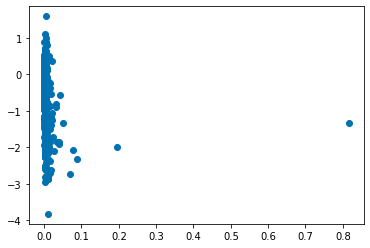

In [872]:
plt.scatter(df_manu['leverage'], y)

En la gráfica anterior podemos ver que hay un punto que sobre sale y está en el extremo derecho, este punto lo tomaremos como leverages points dentro del dataset

## Comprobación de Leverage con librería

c:\Users\Keyuan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Leverage')

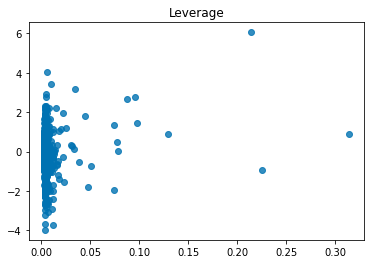

In [873]:
influence = model1.get_influence()

leverage = influence.hat_matrix_diag

sns.regplot(leverage, model1.resid_pearson,  fit_reg=False)
plt.title('Leverage')

Después haber usado algebra matricial y graficar contra y, visualizamos que hay puntos extremos que es necesario eliminar si queremos hacer un modelo preciso. Con la función de describe obtenemos algunos datos estadísticos de leverage.

In [874]:
# Guardar leverage points en una mascara
mask = abs(df_manu['leverage'][0]) > (2*(5+1)/1206)
leverage_points = leverage[mask]
leverage_points = pd.DataFrame(leverage_points)

## Outliers

In [875]:
# Cook's - distance
influence = model1.get_influence()
(cooks, p) = influence.cooks_distance

# get information to a pandas dataframe
cooks = pd.DataFrame(cooks)
cooks.describe()

,0
count,9.640000e+02
mean,3.698617e-03
std,6.853813e-02
min,3.617781e-09
25%,4.700437e-05
50%,1.936946e-04
75%,7.714664e-04
max,2.114958e+00


Con ayuda de la librería es fácil identificar los Outliers con el método de Cook's - distance. Observamos en la descripción de los datos la media es de 0.00886, por lo tanto podemos multiplicar por 3 para ver si existe datos que sobresale de la media por 3 veces.

In [876]:
# Checando outliers y leverage points
mask1 = abs(cooks[0]) > cooks[0].mean()*3
outlier1 = cooks[mask1]
outlier1

,0
53,0.029069
78,0.015078
80,0.053977
89,0.149219
142,0.011443
267,0.063224
273,0.027923
311,0.027016
329,2.114958
334,0.012613


Vemos que existe 10 outliers y lo guardamos dentro de una mascara para después borrarlo

In [877]:
# Standardized Residuals
influence = model1.get_influence()  # create instance of influence
standardized_residuals = influence.resid_studentized_internal  # obtain standardized residuals

# get information to a pandas dataframe
standardized_residuals = pd.DataFrame(standardized_residuals)
standardized_residuals.describe()

,0
count,964.000000
mean,0.001230
std,1.006803
min,-3.983969
25%,-0.509870
50%,0.092158
75%,0.554970
max,6.830278


Usando standardized_residuals como otra forma para identificar más outliers

In [878]:
mask2 = abs(standardized_residuals[0]) >= 3
outlier2 = standardized_residuals[mask2]
outlier2

,0
53,-3.763632
142,-3.091059
267,3.255222
329,6.830278
505,-3.665606
710,-3.203667
771,3.439585
784,-3.983969
904,4.072966


De acuerdo con la lectura, usamos el valor absoluto 3 para identificar más outliers y guardarlo en otra variable para borrarlo después.

## Multicolinealidad (VIF)

In [879]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = df_manu.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_manu.values, i)
                          for i in range(len(df_manu.columns))]

print(vif_data)

                   feature       VIF
0                     EPSP  2.243696
1                      OPM  6.250935
2  Long_Financial_Leverage  1.524301
3                   Return  2.880441
4                    Small  1.931437
5                   Medium  1.414350
6                 leverage  6.824429


El VIF determina cuánto aumenta el error cuadrado a comparación de una correlación 0 con otras variables predictorias en el modelo.

El VIF de EPSP es mayor con 4.208468, esto significa que el error cuadrado para el coeficiente de esa variable de predicción es √4.208468 veces mayor si esa variable de predicción tuviera una correlación 0.

In [880]:
df_manu = df_manu.reset_index()

## Regresión 1

### Estimación de coeficientes para la regresión

In [881]:
# Agregamos una columna de unos
X['1'] = 1

Betas = np.linalg.inv(X.T @ X) @ X.T @ y

print(Betas)

0    2.925832
1    0.000180
2   -0.024260
3   -0.452708
4   -0.212012
5   -0.238082
dtype: float64


In [890]:
# Model statistics
model2 = sm.OLS(y, sm.add_constant(X)).fit()
print_model2 = model2.summary()
print(print_model2)

                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     176.0
Date:                Fri, 25 Nov 2022   Prob (F-statistic):          1.44e-140
Time:                        21:31:51   Log-Likelihood:                -937.26
No. Observations:                1206   AIC:                             1887.
Df Residuals:                    1200   BIC:                             1917.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
EPSP                      

## Regresión 2

In [883]:
# Merge de leverage points y outliers
aux = pd.merge(outlier1, outlier2, left_index=True, right_index=True)
aux

,0_x,0_y
53,0.029069,-3.763632
142,0.011443,-3.091059
267,0.063224,3.255222
329,2.114958,6.830278
771,0.018613,3.439585
904,0.015207,4.072966


In [884]:
X_2 = X.copy()
y_2 = y.copy()

X_2 = X_2.reset_index()
y_2 = y_2.reset_index()

In [885]:
# Eliminar outlieres
X_2 = X_2.drop(aux.index)
y_2 = y_2.drop(aux.index)

### Estimación de coeficientes para la regresión

In [886]:
X_2 = X_2[['EPSP','OPM','Long_Financial_Leverage','Small','Medium']]
y_2 = y_2[['Return']]

In [887]:
# Agregamos una columna de unos
X_2['1'] = 1

Betas_2 = np.linalg.inv(X_2.T @ X_2) @ X_2.T @ y_2

print(Betas_2)

     Return
0  2.925526
1  0.000182
2 -0.018985
3 -0.451465
4 -0.208526
5 -0.240007


In [889]:
# Model statistics
model3 = sm.OLS(y_2, sm.add_constant(X_2)).fit()
print_model3 = model3.summary()
print(print_model3)

                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     175.2
Date:                Fri, 25 Nov 2022   Prob (F-statistic):          6.67e-140
Time:                        21:30:58   Log-Likelihood:                -933.30
No. Observations:                1200   AIC:                             1879.
Df Residuals:                    1194   BIC:                             1909.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
EPSP                      

Después de eliminar los ouliers y generar el nuevo modelo, vemos el modelo mejoró muy poco, vemos que sólo hubo un ligero cambio con los coeficientes.